In [1]:
#Importing Essential Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import layers, models, Input
import os
import cv2

In [3]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
# Data paths

In [5]:
train_data_path = 'Facial_Images/train' 
val_data_path = 'Facial_Images/validation'

In [6]:
# Count training images

In [7]:
x = 0
for expression in os.listdir(train_data_path):
    expression_path = os.path.join(train_data_path, expression)
    print(expression, "  ", len(os.listdir(expression_path)))
    x += len(os.listdir(expression_path))
print("Total Images", x)

angry    3993
disgust    436
fear    4103
happy    7164
neutral    4982
sad    4938
surprise    3205
Total Images 28821


In [8]:
# Count validation images

In [9]:
emotions = []
x = 0
for expression in os.listdir(val_data_path):
    expression_path = os.path.join(val_data_path, expression)
    print(expression, "  ", len(os.listdir(expression_path)))
    emotions.append([expression])
    x += len(os.listdir(expression_path))
print("Total Images", x)

angry    960
disgust    111
fear    1018
happy    1825
neutral    1216
sad    1139
surprise    797
Total Images 7066


In [10]:
print(emotions)

[['angry'], ['disgust'], ['fear'], ['happy'], ['neutral'], ['sad'], ['surprise']]


In [11]:
# Display example images

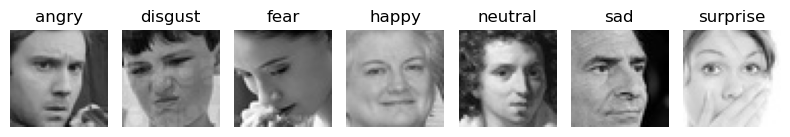

In [12]:
i = 1
plt.figure(figsize=(8, 8))
for expression in os.listdir(train_data_path):
    image_path = os.path.join(train_data_path, expression, os.listdir(os.path.join(train_data_path, expression))[0])
    image = load_img(image_path)
    plt.subplot(1, 7, i)
    plt.imshow(image)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.tight_layout()
plt.show()

In [13]:
#Data Augmentation + Normalization

In [14]:
train_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_data_gen = ImageDataGenerator(rescale=1./255)

In [15]:
# Datasets

In [16]:
train_dataset = train_data_gen.flow_from_directory(
    train_data_path,
    shuffle=True,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128
)

val_dataset = val_data_gen.flow_from_directory(
    val_data_path,
    shuffle=False,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [17]:
# CNN Model

In [18]:
model = models.Sequential()

model.add(Input(shape=(48, 48, 1)))  # Explicit input layer

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 2,311,047 (8.82 MB)

 Trainable params: 2,308,359 (8.81 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [19]:
# Compile

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
#Callbacks for training management and resumption

In [22]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

checkpoint_path = "models/ckpt_epoch_{epoch:02d}_valacc_{val_accuracy:.2f}.keras"

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6),
    ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', save_best_only=False)
]

In [23]:
#Training (with resume support)

In [24]:
model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,  
    verbose=1,
    callbacks=callbacks
)

Epoch 1/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 4512s 5s/step - accuracy: 0.2057 - loss: 2.0425 - val_accuracy: 0.2583 - val_loss: 1.8752 - learning_rate: 0.0010
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - accuracy: 0.2378 - loss: 1.8390 - val_accuracy: 0.2615 - val_loss: 1.8464 - learning_rate: 0.0010
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 372s 2s/step - accuracy: 0.2803 - loss: 1.7601 - val_accuracy: 0.2734 - val_loss: 1.8458 - learning_rate: 0.0010
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.3513 - loss: 1.6483 - val_accuracy: 0.4321 - val_loss: 1.4868 - learning_rate: 0.0010
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.3978 - loss: 1.5352 - val_accuracy: 0.4958 - val_loss: 1.3291 - learning_rate: 0.0010
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.4352 - loss: 1.4753 - val_accuracy: 0.4805 - val_loss: 1.3513 - learning_rate: 0.0010
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.4568 - loss: 1

In [25]:
# Save final model

In [26]:
os.makedirs('models', exist_ok=True)
model.save('models/Face_Emotion_classification.keras')

In [27]:
#Evaluation: Confusion Matrix + Report

56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 388ms/step


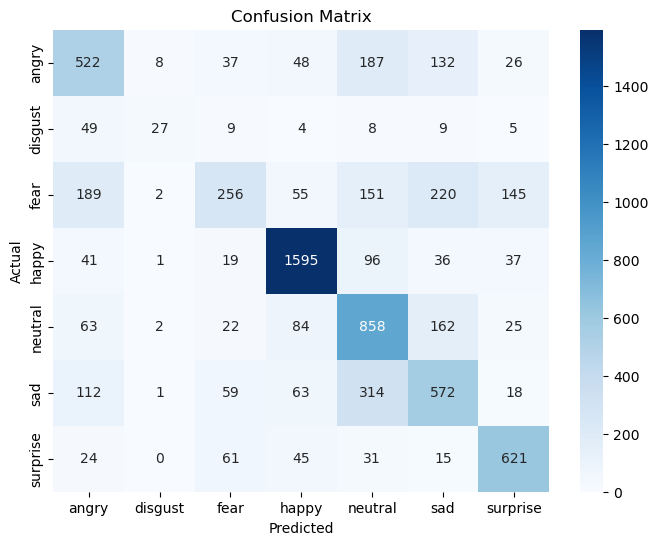

              precision    recall  f1-score   support

       angry       0.52      0.54      0.53       960
     disgust       0.66      0.24      0.36       111
        fear       0.55      0.25      0.35      1018
       happy       0.84      0.87      0.86      1825
     neutral       0.52      0.71      0.60      1216
         sad       0.50      0.50      0.50      1139
    surprise       0.71      0.78      0.74       797

    accuracy                           0.63      7066
   macro avg       0.61      0.56      0.56      7066
weighted avg       0.63      0.63      0.62      7066



In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

val_preds = model.predict(val_dataset)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_dataset.classes
class_names = list(val_dataset.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))

In [81]:
#Make a Prediction (Single Image Inference)

In [89]:
model = tf.keras.models.load_model('models/Face_Emotion_classification.keras')

image = cv2.imread('Google_Images/sample.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (48, 48))
image = cv2.bitwise_not(image)
image = image.astype('float32') / 255.0
image = np.expand_dims(image, axis=(0, -1))

output = model.predict(image)
predicted_class = np.argmax(output)

emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
print(f"Predicted Emotion: {emotion_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
Predicted Emotion: happy
